# Classification on Clean Tech Data

In this notebook, you will learn:
- how to clean/tidy data
- how to deal with unbalanced classes
- various different classification models

In [3]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

ModuleNotFoundError: No module named 'sklearn'

### What dataset will we be using?
We will be working with a dataset about the energy efficiency of various buildings in NYC. This dataset contains all of the combined data from 2015-2017.
<br></br>
New York City (NYC) stands out as one of the largest energy-consuming cities globally, reflecting its vibrant and bustling nature. As a metropolis that never sleeps, NYC's energy demands are immense, driven by its vast population, bustling commercial activities, and extensive infrastructure. The city's towering skyscrapers, iconic landmarks, and bustling transportation systems contribute significantly to its energy consumption. With its millions of residents, thriving businesses, and vibrant tourism industry, NYC requires substantial energy resources to power its buildings, transportation networks, and various services. As a result, the city has been at the forefront of implementing innovative energy efficiency measures and exploring renewable energy sources to address its energy demands and reduce its environmental impact.
<br></br>
This dataset could be useful if we wish to learn more about the distribution of different energy consumption levels across various locations in NYC. For example, we can ask the question, given the building type and its various energy consumption stats, which NYC borough would it likely be located in?
<br></br>
If you would like to access this dataset from the source, you can find it here: https://www.kaggle.com/datasets/mikhailma/energy-efficiency-of-buildings-in-new-york?select=NYC_Energy_Water_Data.csv. Additionally, the zipped folder also contains a Description.csv file, which can tell you more information about what each column means, as some datasets can contain very misinformative column names!

Let's take a look at all the boroughs in NYC: 

In [74]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/NYC_Energy_Water_Data.csv')
data.head() # print out only the first few rows, for easy viewing.

/tmp/ipykernel_76/729194249.py:3: DtypeWarning: Columns (4,10,12,14,15,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/NYC_Energy_Water_Data.csv')


,Order,Property Name,Parent Property Id,Parent Property Name,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,...,District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),DOF Benchmarking Submission Status
0,1,The Argonaut Building,NaN,NaN,Not found,Not found,Manhattan,Office,"Bank Branch, Office",Office,...,1133475.1,1435754.7,16672.2,6551394.1,1920103.6,732.4,76.3,656.1,3635.5,Not found
1,3,Cathedral Preparatory Seminary,NaN,NaN,Not found,Not found,Queens,K-12 School,K-12 School,K-12 School,...,NaN,2068300.1,23243.7,616343.7,184131.9,164.5,109.9,54.6,102.9,Not found
2,4,The Nomad Hotel,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,8245445.1,86776.9,8033914.4,2354605.3,1150.2,438.0,712.3,10762.6,Not found
3,5,10 West 27 Street Corp,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,1848519.4,20520.9,1976691.9,582516.1,273.4,98.2,175.3,790.1,Not found
4,6,Westbury Realty,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,NaN,NaN,1022951.6,299809.9,90.7,0.0,90.7,143.0,Not found


### The Boroughs of New York City
NYC has 5 Boroughs. They are:
1. Manhattan
2. Brooklyn
3. Bronx
4. Queens
5. Staten Island

The five boroughs of New York City collectively form a vibrant and diverse urban landscape, each with its distinct character and charm. Manhattan, the heart of NYC, is renowned for its iconic skyline, bustling streets, and world-class attractions like Times Square and Central Park. Brooklyn, with its trendy neighborhoods, artistic vibes, and thriving food scene, has become a haven for creative minds and a hub of cultural diversity. Queens boasts a rich multicultural tapestry, offering a blend of diverse communities, sprawling parks, and the bustling energy of Flushing Meadows-Corona Park. The Bronx, known for its rich history and cultural heritage, is home to renowned attractions like Yankee Stadium and the beautiful Bronx Zoo. Staten Island, embraced by natural beauty, offers a tranquil escape with its picturesque landscapes, including the stunning Staten Island Greenbelt and the famous Staten Island Ferry. Together, these five boroughs embody the vibrant spirit and global allure that make NYC a truly exceptional city.

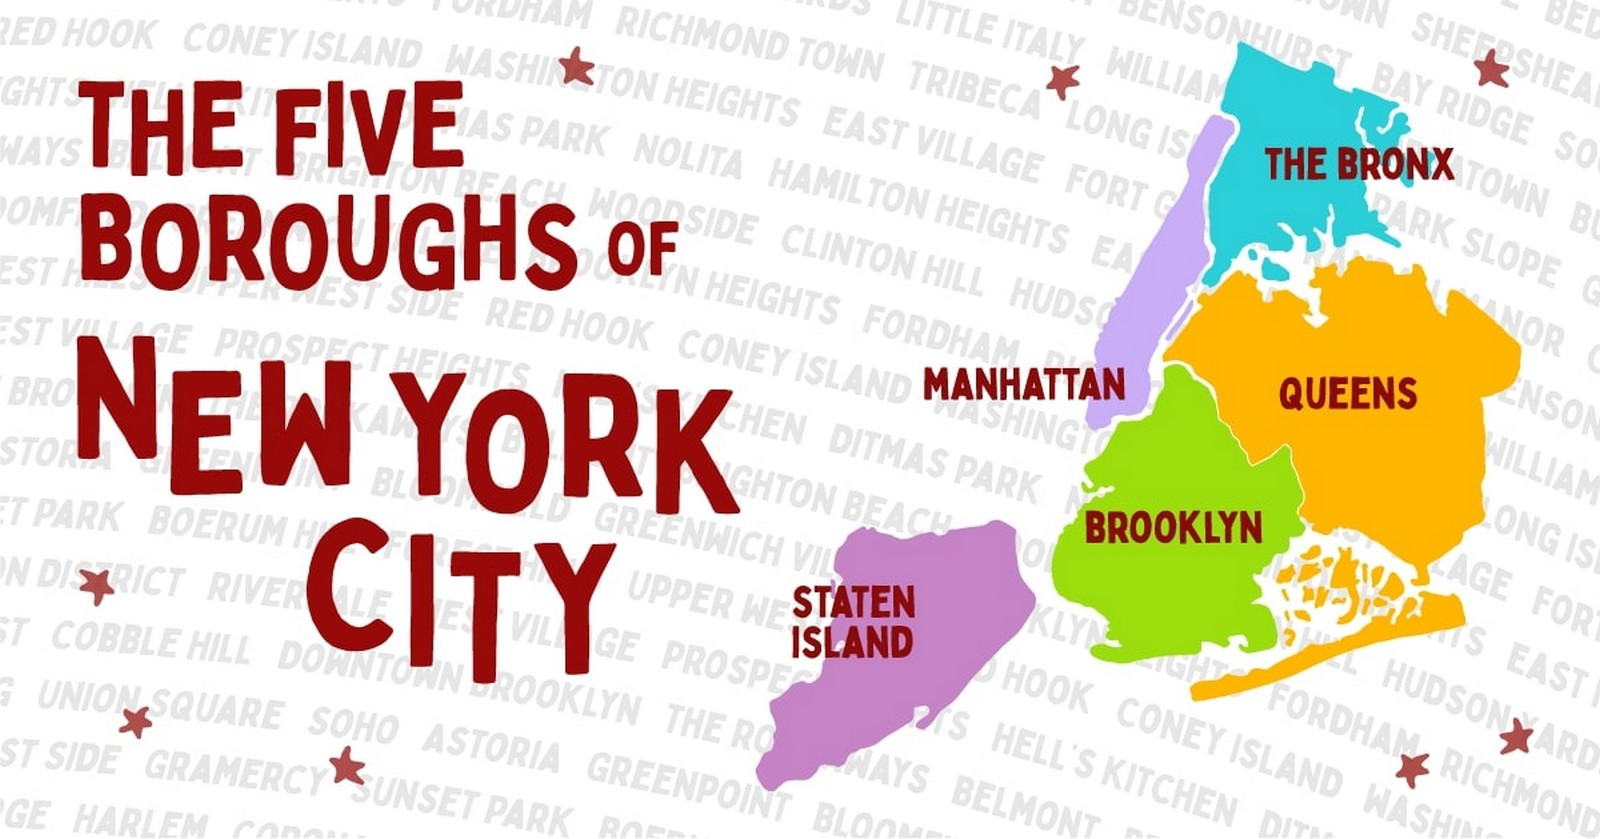


All of the preprocessing steps above were done to ensure we have the correct Borough information. Some rows had issues with capitalization, some rows had whitespaces that needed to be cleared.

In [75]:
data['Borough'].value_counts()

Manhattan        24136
Brooklyn         12865
Bronx            10813
Queens            9821
Staten Island     1015
Not Available      423
Manhattan           41
Brooklyn            32
brooklyn            26
BROOKLYN            15
bronx                8
QUEENS               3
BRONX                2
staten Island        2
STATEN ISLAND        1
Pine Hill            1
Patchogue            1
staten island        1
Name: Borough, dtype: int64

So it appears many boroughs show up as the same, but python decides they're different because of the different in capitalization. 

To address this issue, let's use the ```str.title()``` function to only capitalize the first letter of each word.

In [76]:
data['Borough'].str.title().value_counts()

Manhattan        24136
Brooklyn         12906
Bronx            10823
Queens            9824
Staten Island     1019
Not Available      423
Manhattan           41
Brooklyn            32
Pine Hill            1
Patchogue            1
Name: Borough, dtype: int64

This helped a bit, but something strange is happening. I suspect it's caused by trailing whitespace that we can't see. 

Let's use the ```str.strip()``` function to remove the whitespace. 

In [77]:
data['Borough'].str.title().str.strip().value_counts()

Manhattan        24177
Brooklyn         12938
Bronx            10823
Queens            9824
Staten Island     1019
Not Available      423
Pine Hill            1
Patchogue            1
Name: Borough, dtype: int64

In [78]:
data['Borough'] = data['Borough'].str.title().str.strip() # Assign the Borough column to our cleaned and tidy column.

In [79]:
data['Borough'].value_counts()

Manhattan        24177
Brooklyn         12938
Bronx            10823
Queens            9824
Staten Island     1019
Not Available      423
Pine Hill            1
Patchogue            1
Name: Borough, dtype: int64

This is more of what we want!

Let's only consider NYC's major boroughs (Manhattan, Brooklyn, Bronx, Queens, and Staten Island). This means removing Pine Hill, Patchogue, and anything labeled Not Available. 

In [80]:
# Drop the Boroughs that we don't want.

data = data.drop(data[(data['Borough'] == 'Pine Hill') | (data['Borough'] == 'Patchogue') | (data['Borough'] == 'Not Available')].index)

In [81]:
data.head()

,Order,Property Name,Parent Property Id,Parent Property Name,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,...,District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),DOF Benchmarking Submission Status
0,1,The Argonaut Building,NaN,NaN,Not found,Not found,Manhattan,Office,"Bank Branch, Office",Office,...,1133475.1,1435754.7,16672.2,6551394.1,1920103.6,732.4,76.3,656.1,3635.5,Not found
1,3,Cathedral Preparatory Seminary,NaN,NaN,Not found,Not found,Queens,K-12 School,K-12 School,K-12 School,...,NaN,2068300.1,23243.7,616343.7,184131.9,164.5,109.9,54.6,102.9,Not found
2,4,The Nomad Hotel,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,8245445.1,86776.9,8033914.4,2354605.3,1150.2,438.0,712.3,10762.6,Not found
3,5,10 West 27 Street Corp,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,1848519.4,20520.9,1976691.9,582516.1,273.4,98.2,175.3,790.1,Not found
4,6,Westbury Realty,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,NaN,NaN,1022951.6,299809.9,90.7,0.0,90.7,143.0,Not found


In [82]:
data['Borough'].value_counts()

Manhattan        24177
Brooklyn         12938
Bronx            10823
Queens            9824
Staten Island     1019
Name: Borough, dtype: int64

### Now that we have cleaned our target variable (Borough), we are ready to select which features we want to use.


Let's consider the following columnns:
- Property Name
- Primary Property Type - Self Selected
- Largest Property Use Type - Gross Floor Area (ftÂ²)
- Year Built
- Occupancy
- District Steam Use (kBtu)
- Natural Gas Use (kBtu)
- Electricity Use - Grid Purchase (kBtu)
- Direct GHG Emissions (Metric Tons CO2e)
- Indirect GHG Emissions (Metric Tons CO2e)

Don't forget Borough is the target variable.

In [83]:
# Select the columns we want using index-based selection, the number corresponds to particular column number from the dataset.
data = data.iloc[: , [1,7,9,15,16,31,32,34,37,38,6]] 
data

,Property Name,Primary Property Type - Self Selected,Largest Property Use Type,Year Built,Occupancy,District Steam Use (kBtu),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Borough
0,The Argonaut Building,Office,Office,1909,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,Manhattan
1,Cathedral Preparatory Seminary,K-12 School,K-12 School,1963,100.0,NaN,2068300.1,616343.7,109.9,54.6,Queens
2,The Nomad Hotel,Hotel,Hotel,1999,85.0,NaN,8245445.1,8033914.4,438.0,712.3,Manhattan
3,10 West 27 Street Corp,Hotel,Hotel,1994,100.0,NaN,1848519.4,1976691.9,98.2,175.3,Manhattan
4,Westbury Realty,Hotel,Hotel,2012,0.0,NaN,NaN,1022951.6,0.0,90.7,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...
59319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island


Now, let's rename some columns. We can shorten the column names and also remove the unnecessary units.

In [84]:
data.rename(columns={"Primary Property Type - Self Selected":"Primary Property Type", "Largest Property Use Type - Gross Floor Area (ftÂ²)" : "Largest Property Use Type", "District Steam Use (kBtu)" : "District Steam Use", 
                     "Natural Gas Use (kBtu)" : "Natural Gas Use", "Electricity Use - Grid Purchase (kBtu)" : "Electricity Use", "Direct GHG Emissions (Metric Tons CO2e)" : "Direct GHG Emissions", "Indirect GHG Emissions (Metric Tons CO2e)" : "Indirect GHG Emissions"}, inplace=True)
data

,Property Name,Primary Property Type,Largest Property Use Type,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Borough
0,The Argonaut Building,Office,Office,1909,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,Manhattan
1,Cathedral Preparatory Seminary,K-12 School,K-12 School,1963,100.0,NaN,2068300.1,616343.7,109.9,54.6,Queens
2,The Nomad Hotel,Hotel,Hotel,1999,85.0,NaN,8245445.1,8033914.4,438.0,712.3,Manhattan
3,10 West 27 Street Corp,Hotel,Hotel,1994,100.0,NaN,1848519.4,1976691.9,98.2,175.3,Manhattan
4,Westbury Realty,Hotel,Hotel,2012,0.0,NaN,NaN,1022951.6,0.0,90.7,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...
59319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
59322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island


### What does running ```.info()``` tell us about our EV dataset?

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58899 entries, 0 to 59323
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property Name              57480 non-null  object 
 1   Primary Property Type      57654 non-null  object 
 2   Largest Property Use Type  57622 non-null  object 
 3   Year Built                 57654 non-null  object 
 4   Occupancy                  57480 non-null  float64
 5   District Steam Use         24869 non-null  object 
 6   Natural Gas Use            50503 non-null  object 
 7   Electricity Use            54596 non-null  object 
 8   Direct GHG Emissions       56181 non-null  object 
 9   Indirect GHG Emissions     56177 non-null  object 
 10  Borough                    58781 non-null  object 
dtypes: float64(1), object(10)
memory usage: 5.4+ MB


It seems like many rows have null values, and columns that are supposed to be numbers (ie electricity use) are of the object datatype instead. 

Let's use the ```dropna``` function to handle these null values.

In [86]:
data.dropna(inplace=True)

Did this solve our issues? Let's output data to see.

In [87]:
data

,Property Name,Primary Property Type,Largest Property Use Type,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Borough
0,The Argonaut Building,Office,Office,1909,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,Manhattan
6,155 West 66th Street Condominium,Hotel,Hotel,1999,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,Manhattan
44,madison square garden,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,1968,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,Manhattan
50,university club of New York,Hotel,Hotel,1899,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,Manhattan
82,"120 Broadway Holdings, LLC",Office,Office,1915,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...
58074,St. Joseph by-the-Sea,K-12 School,K-12 School,1963,100.0,Not Available,8345200.1,2734290.1,443.3,226.8,Staten Island
58075,STATEN ISLAND UNIVERSITY HOSPITAL Seguine,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1950,100.0,Not Available,66815614.2,20082283.2,4060.3,1665.5,Staten Island
58076,N001597-S STATEN ISLAND NY,Retail Store,Retail Store,2012,100.0,Not Available,1020290.0,6655085.9,54.2,551.9,Staten Island
58077,Amboy Plaza Realty LLC,Supermarket/Grocery Store,Supermarket/Grocery Store,1993,100.0,Not Available,1991000.0,11183127.3,105.8,927.5,Staten Island


Hmmm, so it appears there's some columns that contain "Not Available". Let's handle this by determining which columns exactly have "Not Available" values.

In [88]:
for col in data:
    print("Is Not Available in", col, ('Not Available' in data[col].unique()))

Is Not Available in Property Name False
Is Not Available in Primary Property Type False
Is Not Available in Largest Property Use Type True
Is Not Available in Year Built False
Is Not Available in Occupancy False
Is Not Available in District Steam Use True
Is Not Available in Natural Gas Use True
Is Not Available in Electricity Use True
Is Not Available in Direct GHG Emissions True
Is Not Available in Indirect GHG Emissions True
Is Not Available in Borough False


/tmp/ipykernel_76/69101581.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Is Not Available in", col, ('Not Available' in data[col].unique()))


So it appears "Largest Property Use Type", "District Steam Use", "Natural Gas Use", "Electricity Use", "Direct GHG Emissions", and "Indirect GHG Emissions" all need to be cleaned. 


In [89]:
# Ensure all rows do not have 'Not Available' anywhere in the dataset

data = data[(data['Largest Property Use Type']!='Not Available') & (data['District Steam Use']!='Not Available') & (data['Natural Gas Use']!='Not Available') 
     & (data['Electricity Use']!='Not Available') & (data['Direct GHG Emissions']!='Not Available') & (data['Indirect GHG Emissions']!='Not Available')]

This filtered our values by a substantial number. Let's see our dataframe now.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 57470
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property Name              1970 non-null   object 
 1   Primary Property Type      1970 non-null   object 
 2   Largest Property Use Type  1970 non-null   object 
 3   Year Built                 1970 non-null   object 
 4   Occupancy                  1970 non-null   float64
 5   District Steam Use         1970 non-null   object 
 6   Natural Gas Use            1970 non-null   object 
 7   Electricity Use            1970 non-null   object 
 8   Direct GHG Emissions       1970 non-null   object 
 9   Indirect GHG Emissions     1970 non-null   object 
 10  Borough                    1970 non-null   object 
dtypes: float64(1), object(10)
memory usage: 184.7+ KB


Before, we had 58899 rows. After removing NA values and those with "Not Available", we now have 1970 rows. 
Turns out many rows contained dirty data that we just couldn't work with. 


However, there's still columns that have the datatype object, when they should be numerical (Electricity Use, for example). Let's convert the datatype of some columns!

In [91]:
# Change datatypes of certain columns
data = data.astype({'Year Built':'float' , 'District Steam Use':'float' , 'Natural Gas Use':'float' , 'Electricity Use':'float' , 'Direct GHG Emissions':'float' , 'Indirect GHG Emissions':'float'})

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 57470
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property Name              1970 non-null   object 
 1   Primary Property Type      1970 non-null   object 
 2   Largest Property Use Type  1970 non-null   object 
 3   Year Built                 1970 non-null   float64
 4   Occupancy                  1970 non-null   float64
 5   District Steam Use         1970 non-null   float64
 6   Natural Gas Use            1970 non-null   float64
 7   Electricity Use            1970 non-null   float64
 8   Direct GHG Emissions       1970 non-null   float64
 9   Indirect GHG Emissions     1970 non-null   float64
 10  Borough                    1970 non-null   object 
dtypes: float64(7), object(4)
memory usage: 184.7+ KB


Great! We have converted our desired columns from object to float (numberical). 

### Let's perform some preliminary visualization on our data.

In [93]:
import pandas as pd
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
bpl.output_notebook()

bokehData = data


df = pd.DataFrame(
    {
        "borough": bokehData["Borough"],
        "var1": bokehData["Natural Gas Use"],
        "var2":  bokehData["Electricity Use"]
    }
)
source = bpl.ColumnDataSource(df)

# use whatever palette you want...
palette = d3['Category10'][len(df['borough'].unique())]
color_map = bmo.CategoricalColorMapper(factors=df['borough'].unique(),
                                   palette=palette)

# create figure and plot
p = bpl.figure(title="Scatterplot of Electricity Use vs Natural Gas Use, by Borough", 
               x_axis_label="Natural Gas Use (kBtu)",
               y_axis_label="Electricity Use (kBtu)")
p.scatter(x='var1', y='var2',
          color={'field': 'borough', 'transform': color_map},
          legend_field='borough', source=source)
bpl.show(p)

Loading BokehJS ...

As we can see, the majority is dominated by Manhattan, and the other boroughs have a small minority.

### Now, lets create a binary variable, for binary classification.

Let's say our question was determining whether a certain building was in the Bronx.

**Since this becomes a binary classification problem, we must remove the Borough column, as that has more than 2 categories**

In [94]:
dummies = pd.get_dummies(data, columns=['Borough'])[['Borough_Bronx']]
# print(type(dummies['Borough_Bronx']))
# dummies['Borough_Bronx'].index
dummies

,Borough_Bronx
0,0
6,0
44,0
50,0
82,0
...,...
53674,0
57461,0
57463,0
57466,0


In [95]:
# There are two ways of handling SettingWithCopy warning.

# Method 1:
# data = data.copy()
# data['Is_Bronx'] = dummies['Borough_Bronx']


# Method 2:
data = data.assign(Is_Bronx = dummies['Borough_Bronx'])
upsampleDC = data

In [96]:
data.head()

,Property Name,Primary Property Type,Largest Property Use Type,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Borough,Is_Bronx
0,The Argonaut Building,Office,Office,1909.0,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,Manhattan,0
6,155 West 66th Street Condominium,Hotel,Hotel,1999.0,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,Manhattan,0
44,madison square garden,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,1968.0,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,Manhattan,0
50,university club of New York,Hotel,Hotel,1899.0,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,Manhattan,0
82,"120 Broadway Holdings, LLC",Office,Office,1915.0,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,Manhattan,0


In [97]:
# Provide us correlation values
data.corr()['Is_Bronx'] * 100

/tmp/ipykernel_76/3928322071.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Is_Bronx'] * 100


Year Built                 -4.841208
Occupancy                   2.291704
District Steam Use         -0.860794
Natural Gas Use            -0.629871
Electricity Use            -3.845536
Direct GHG Emissions       -0.642270
Indirect GHG Emissions     -0.893783
Is_Bronx                  100.000000
Name: Is_Bronx, dtype: float64

The above corr() information tells us as the electricity use of a building increases, the lower probability that building is in the Bronx. Morever, it appears that buildings with higher occupancy values would increase the likelihood that particular building is in the Bronx.  

In [98]:
def transform_to_numeric(df):
    d1 = df.drop(labels=['Borough'], axis=1).fillna(0)
    return pd.get_dummies(d1).replace({True: 1, False: 0})
numeric = transform_to_numeric(data)
numeric.head()

,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Is_Bronx,Property Name_(5090) Turin Housing Inc,Property Name_(7015) - 15 William St,...,Largest Property Use Type_Parking,Largest Property Use Type_Police Station,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Worship Facility
0,1909.0,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1999.0,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,1968.0,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,1899.0,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,1915.0,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X = numeric.drop('Is_Bronx', axis=1)
y = numeric['Is_Bronx']

X

,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Property Name_(5090) Turin Housing Inc,Property Name_(7015) - 15 William St,Property Name_(7018) - Morgan Court Condo,...,Largest Property Use Type_Parking,Largest Property Use Type_Police Station,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Worship Facility
0,1909.0,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1999.0,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,1968.0,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,1899.0,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,1915.0,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53674,1910.0,100.0,208761.2,1419474.2,897630.3,75.4,88.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57461,1950.0,100.0,5289828.7,45137004.2,15003678.7,2397.4,2215.9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57463,1950.0,100.0,2230857.1,398052.9,878239.2,21.1,384.7,0,0,0,...,0,0,1,0,0,0,0,0,0,0
57466,2000.0,100.0,779980.5,2598856.0,3342472.2,138.0,383.5,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
y.value_counts() # This tells us only 19 buildings are located in the Bronx. We will address this class imbalance problem later. 

0    1951
1      19
Name: Is_Bronx, dtype: int64

1951 buildings are not in Bronx, and only 19 buildings are. 

We can calculate the proportion of this binary class:

Not in Bronx: 1951 / (1951+19) = 0.990 

In Bronx: 19 / (1951+19) = 0.010

In [101]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dummy Classification

To start off, let's use a ```DummyClassifier``` as our first model. The ```DummyClassifier``` is sklearn's baseline model for classification (there is a separate ```DummyRegressor``` which is used for regression problems). 

Baseline models are the most simplistic machine learning algorithms, and depending on how you define the strategy, it can make conclusions differently. For example, we will be using the ```most frequent``` setting, which always predicts the most frequent label in the dataset. 

The purpose of baselines is to provide a way to sanity check your machine learning model. 

When it comes to working with classification models on the whole, there is a general guideline to training a classifier:

1. Read the data
2. Create training and testing data for both your features (X) and target variable (y). The target variable in this case would be a categorical variable (classes).
3. Next step is to create the classifier object. This could be a dummy classifier, logistic regression, K-nearest neighbours, SVMs (support vector machines), and more.
4. ```fit``` the classifier.
5. ```predict``` on new examples (X_test).
6. ```score``` the model, by comparing the predictions from X_test using your model against true values of the y_test. 

In [102]:
from sklearn.dummy import DummyClassifier # import the classifier

dummy_clf = DummyClassifier(strategy="most_frequent") # Create a classifier object

dummy_clf.fit(X_train, y_train); # fit the classifier

print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X_test, y_test)))

The accuracy of the model on the training data: 0.992


It seems like our DummyClassifier has an extremely high accuracy. 
Since we set our strategy to be ```most_frequent```, our DummyClassifier always predicts the class that has the majority of occurences. Previously, we saw that the majority of buildings are **not** located in the Bronx. 

Let's use ```value_counts``` to confirm. 

In [103]:
y.value_counts(normalize=True)

0    0.990355
1    0.009645
Name: Is_Bronx, dtype: float64

As you can see, the 99% rate almost matches the accuracy of our dummy classifier.

This percentage seems very high for any classifier, regardless of the model. Let's try utilizing some upsampling methods to balance out our accuracy values. 

### Upsampling for Binary Classification

Let's take the ```upsampleDC``` we created above after finalizaing the dataset and upsample the minority class (in Bronx).

In [104]:
upsampleDC = upsampleDC.drop(['Borough'], axis = 1)
upsampleDC.head()

,Property Name,Primary Property Type,Largest Property Use Type,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Is_Bronx
0,The Argonaut Building,Office,Office,1909.0,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,0
6,155 West 66th Street Condominium,Hotel,Hotel,1999.0,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,0
44,madison square garden,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,1968.0,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,0
50,university club of New York,Hotel,Hotel,1899.0,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,0
82,"120 Broadway Holdings, LLC",Office,Office,1915.0,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,0


In [105]:
upsampleDC['Is_Bronx'].value_counts(normalize=True)

0    0.990355
1    0.009645
Name: Is_Bronx, dtype: float64

In [106]:
# pip install -U imbalanced-learn

In [107]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority") # we wish to upsample the not majority class (minority class)
X_res , y_res = ros.fit_resample(X,y)

In [108]:
y_res.value_counts(normalize=True)

0    0.5
1    0.5
Name: Is_Bronx, dtype: float64

As you can see, the frequency of our binary class is now equal. There is a 50-50 split of buildings in Bronx, and not in Bronx. 

In [109]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Dummy Classification for Upsampled Binary Classification

In [110]:
from sklearn.dummy import DummyClassifier # import the classifier

dummy_clf = DummyClassifier(strategy="most_frequent") # Create a classifier object

dummy_clf.fit(X_res_train, y_res_train); # fit the classifier

print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X_res_test, y_res_test)))

The accuracy of the model on the training data: 0.478


After fitting our dummy classifier, we get an accuracy of approximately 50%, which makes sense since we have an equal number of Bronx and non-Bronx samples!

### Logistic Regression (for binary classification, Bronx or no?) 

Logistic regression is a statistical analysis method that predicts the probability of a binary outcome, such as pass/fail or yes/no, based on input variables. It uses a mathematical formula and the sigmoid function to transform the probability into a range between 0 and 1. By adjusting the formula's parameters through training, logistic regression minimizes the difference between predicted probabilities and actual outcomes in the data. Ultimately, it provides a way to understand the relationship between variables and make predictions about binary outcomes.

The way logistic regression works is that each feature (variable) has an associated weight. This weight value (also known as coefficient) ultimately determines how impactful that variable is to the final result. After summing up all the weight values (and taking into account a bias term), we look to see if a threshold has been reached. If the total value is above a certain threshold, we can say it's in the Bronx. If it's below the threshold, then it's not in the Bronx. 

Logistic regression, a type of linear classifier, is a linear function of the input `X` (your training data), followed by a **threshold**. 

\begin{equation}
\begin{split}
z =& w_1x_1 + \dots + w_dx_d + b\\
=& w^Tx + b
\end{split}
\end{equation}

$$\hat{y} = \begin{cases}
         1, & \text{if } z \geq r\\
         -1, & \text{if } z < r
\end{cases}$$

where $\hat{y}=1$ represents the building being in the Bronx, and $\hat{y}=-1$ being not. The key point of understanding is that r is the threshold representing whether it would be or not.


#### Components of a linear classifier

1. input features ($x_1, \dots, x_d$)
2. coefficients (weights) ($w_1, \dots, w_d$)
3. bias ($b$ or $w_0$) (can be used to offset your hyperplane)
4. threshold ($r$)

In [111]:
clf = LogisticRegression()
clf

LogisticRegression()

In [112]:
clf.fit(X_res_train,y_res_train)

LogisticRegression()

In [113]:
clf.score(X_res_test,y_res_test)

0.5185659411011524

### Handling Class Imbalance for Multi-Class Classification:

If we take a look at our bokehData variable which contains our data after being cleaned, we can see that there is an extreme class imbalance.

In [114]:
bokehData['Borough'].value_counts()

Manhattan    1935
Bronx          19
Queens         12
Brooklyn        4
Name: Borough, dtype: int64

We can address this issue by using a combination of both upsampling and downsampling methods. 

Upsampling means to increase the repetition of certain classes, while downsampling means the decrease the frequency of a certain variable. 

But first, let's split our values into X and y first. 

Our X would contain everything except our target variable (Borough), and our y would contain only the Borough variable, nothing else.

It's important to note that we are only looking for numerical columns. Some models won't accept categorical data. Let's filter for numerical columns now.

In [115]:
data = bokehData.iloc[: , 3:]
data

,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions,Borough
0,1909.0,95.0,1133475.1,1435754.7,6551394.1,76.3,656.1,Manhattan
6,1999.0,100.0,7195772.2,1902140.0,7622453.3,101.0,1153.6,Manhattan
44,1968.0,100.0,38591282.7,6441106.3,89965163.2,342.1,2562.4,Manhattan
50,1899.0,100.0,18433.3,2023996.8,12499014.8,107.5,1109.4,Manhattan
82,1915.0,95.0,40817632.0,2077306.9,83856768.2,110.3,10144.9,Manhattan
...,...,...,...,...,...,...,...,...
53674,1910.0,100.0,208761.2,1419474.2,897630.3,75.4,88.3,Brooklyn
57461,1950.0,100.0,5289828.7,45137004.2,15003678.7,2397.4,2215.9,Queens
57463,1950.0,100.0,2230857.1,398052.9,878239.2,21.1,384.7,Queens
57466,2000.0,100.0,779980.5,2598856.0,3342472.2,138.0,383.5,Queens


In [116]:
X = data.drop(columns=["Borough"])
y = data["Borough"]

y.value_counts()

Manhattan    1935
Bronx          19
Queens         12
Brooklyn        4
Name: Borough, dtype: int64

In [117]:
# pip install -U imbalanced-learn

In [118]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming X (feature matrix) and y (target variable) are defined

# Calculate the class distribution
class_distribution = dict(Counter(y))

# Identify the majority class label
majority_class = max(class_distribution, key=class_distribution.get)

numberOfSamples = 75

# Define the desired number of samples for the majority class
undersampling_ratio = {majority_class: numberOfSamples}

# Define the desired number of samples for the other three classes
oversampling_ratio = {
    'Brooklyn': numberOfSamples,
    'Queens': numberOfSamples,
    'Bronx': numberOfSamples
}

# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy=undersampling_ratio, random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Oversample the other three classes
ros = RandomOverSampler(sampling_strategy=oversampling_ratio, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_undersampled, y_undersampled)


X_resampled

,Year Built,Occupancy,District Steam Use,Natural Gas Use,Electricity Use,Direct GHG Emissions,Indirect GHG Emissions
0,1940.0,100.0,14818338.7,1913245.4,5522464.4,101.6,1473.5
1,1940.0,100.0,8473946.2,937357.5,3224155.4,49.8,848.5
2,1940.0,100.0,14280965.1,816448.5,4237342.8,43.4,1323.9
3,1940.0,100.0,14384888.5,1166539.4,3770918.8,62.0,1289.5
4,1940.0,100.0,5505914.4,498321.2,1465918.5,26.5,495.6
...,...,...,...,...,...,...,...
295,2000.0,100.0,779980.5,2598856.0,3342472.2,138.0,383.5
296,1950.0,100.0,5289828.7,45137004.2,15003678.7,2397.4,2215.9
297,2000.0,100.0,134087.2,2583716.1,874108.1,137.2,186.5
298,1950.0,100.0,5244587.0,65249964.6,14184351.8,3465.7,2202.7


In [119]:
y_resampled.value_counts()

Bronx        75
Brooklyn     75
Manhattan    75
Queens       75
Name: Borough, dtype: int64

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X (feature matrix) and y (target variable) are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### K-NN on multi-class classification

KNN (k-nearest neighbors) multi-class classification is an algorithm used to classify data into multiple classes. The algorithm works by finding the k closest neighbors to a given data point in the feature space based on a distance metric, such as Euclidean distance. These neighbors are determined by comparing the feature values of the data points in the training set. Once the k nearest neighbors are identified, the algorithm assigns the class label that is most prevalent among those neighbors to the new data point. In other words, it selects the class label that has the highest representation within the k nearest neighbors. KNN multi-class classification is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution, and it can handle both numerical and categorical features.

In [121]:
# # Create an instance of the k-Nearest Neighbors classifier
# knn = KNeighborsClassifier(n_neighbors=3)

# # Fit the model to the training data
# knn.fit(X_train, y_train)

# # Predict the target variable for the test set
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [122]:
results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, return_train_score=True)
    results_dict["n_neighbors"].append(k)

    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)

In [123]:
results_df = results_df.set_index("n_neighbors")
results_df

,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
1,1.000000,0.945833,0.036324,0.000000
6,0.906250,0.887500,0.031180,0.009317
11,0.888542,0.875000,0.037268,0.012148
16,0.848958,0.841667,0.042898,0.013975
21,0.752083,0.729167,0.047507,0.021999
26,0.740625,0.704167,0.024296,0.023616
31,0.721875,0.658333,0.052042,0.023199
36,0.675000,0.654167,0.061237,0.023199
41,0.630208,0.587500,0.065085,0.039391


<Axes: xlabel='n_neighbors'>

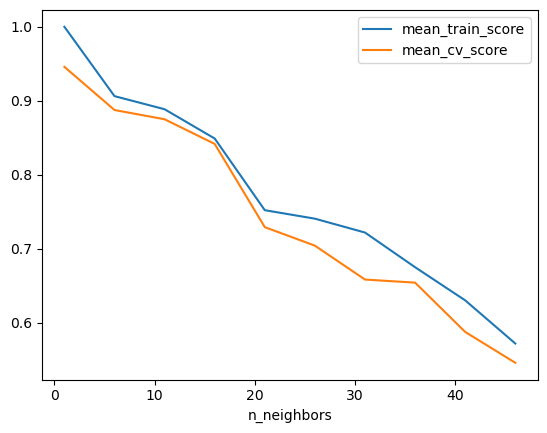

In [124]:
results_df[["mean_train_score", "mean_cv_score"]].plot()

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Train accuracy: %0.3f" % (knn.score(X_train, y_train)))
print("Test accuracy: %0.3f" % (knn.score(X_test, y_test)))

Train accuracy: 0.933
Test accuracy: 0.783


### Logistic Regression on multi-class classification

We are using the concept of logistic regression, as explained previously. The only differene is that instead of a binary classificaiton problem, we will turn this into a multi-class classification problem. Specifically, we will have 4 classes.  

In [126]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [127]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [128]:
clf.score(X_test, y_test)

0.8166666666666667